In [5]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Load the dataset
file_path = 'glass.csv'
glass_data = pd.read_csv(file_path)
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
# Display the summary statistics of the dataset
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
# Check for missing values
glass_data.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
glass_data.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [3]:

# Categorical and Numerical features based on the provided description
categorical_columns = ['Type']
numerical_columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


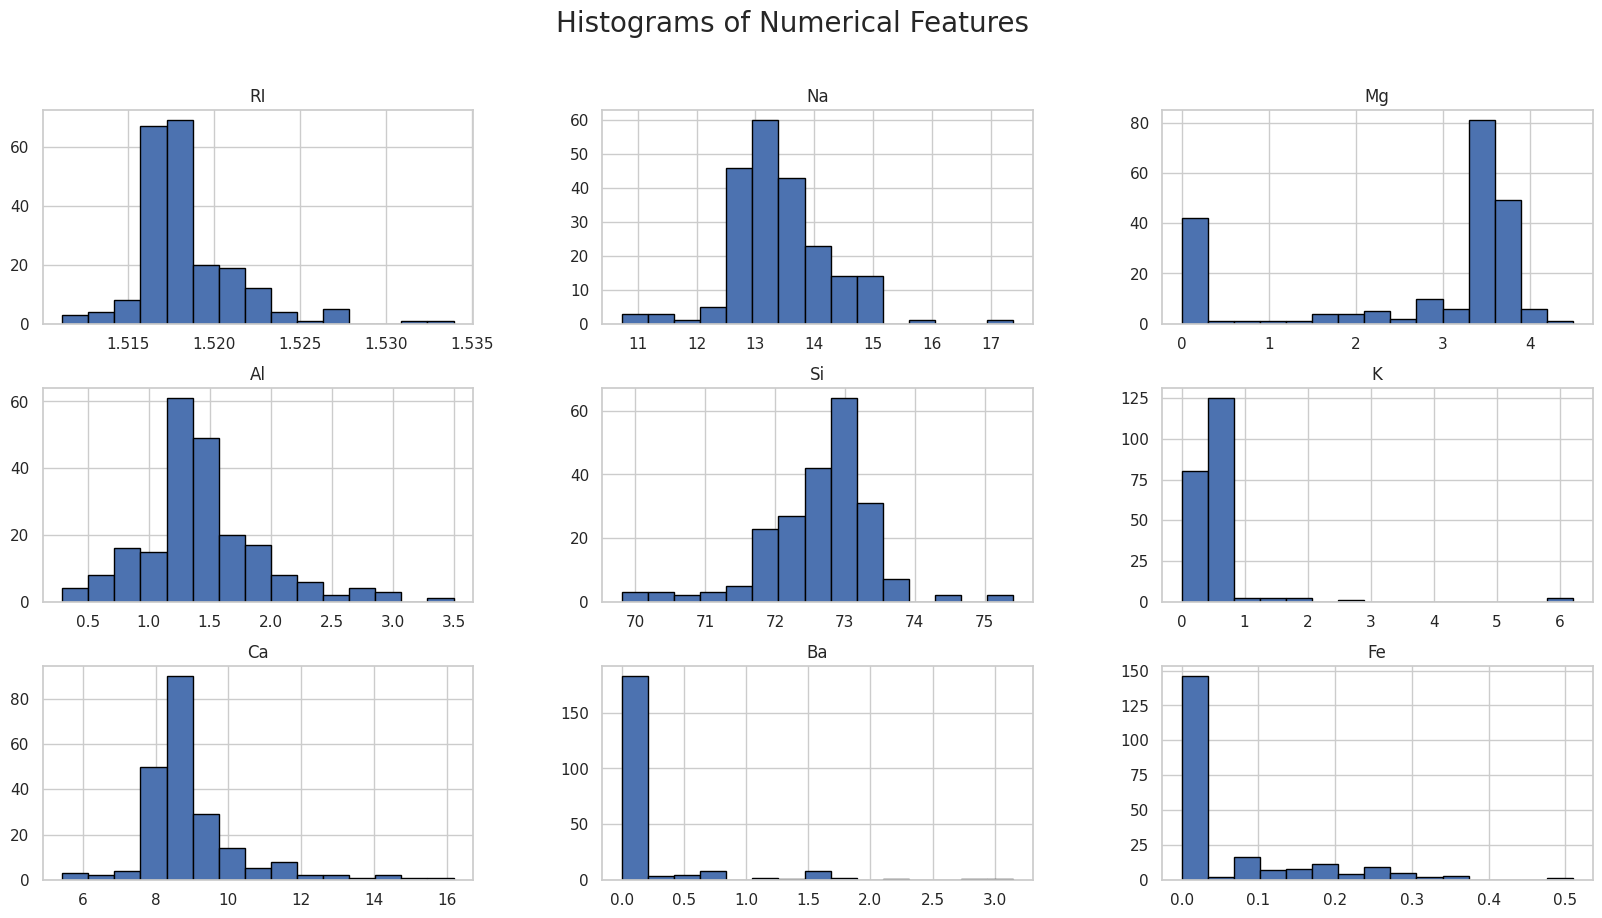

In [ ]:

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Histograms for each numerical feature
glass_data[numerical_columns].hist(bins=15, figsize=(20, 10), layout=(3, 3), edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=20)
plt.show()


<ipython-input-7-3969b829ac34>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=glass_data, x='Type', palette='Set2')


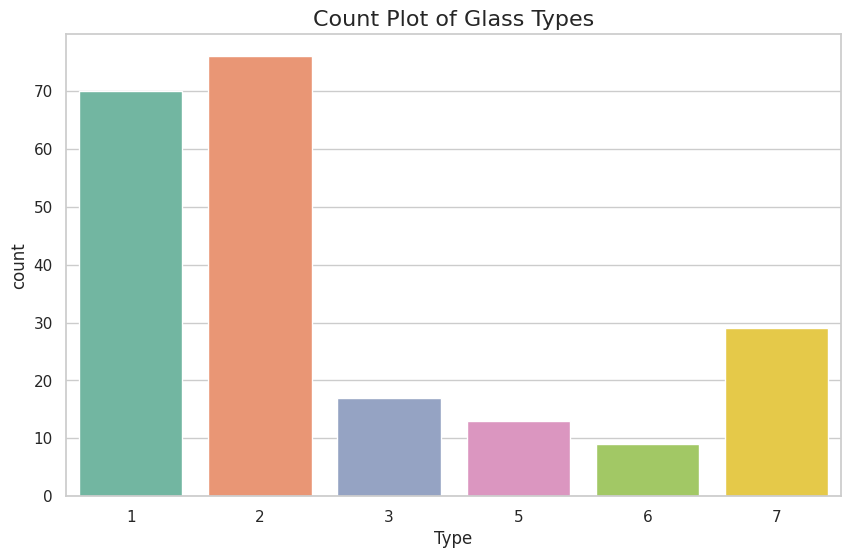

In [ ]:
# . Count plot for the categorical feature 'Type'
plt.figure(figsize=(10, 6))
sns.countplot(data=glass_data, x='Type', palette='Set2')
plt.title('Count Plot of Glass Types', fontsize=16)
plt.show()

In [6]:
# Separate features and target variable
X = glass_data[numerical_columns]
y = glass_data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Initialize models

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

rf_model = RandomForestClassifier(random_state=42)  # Bagging
ada_model = AdaBoostClassifier(random_state=42)     # Boosting (AdaBoost)
gb_model = GradientBoostingClassifier(random_state=42)  # Boosting (GradientBoosting)


In [14]:
# Train models
rf_model.fit(X_train_res_scaled, y_train_res)
ada_model.fit(X_train_res_scaled, y_train_res)
gb_model.fit(X_train_res_scaled, y_train_res)


GradientBoostingClassifier(random_state=42)

In [15]:
# Predict on test data
rf_pred = rf_model.predict(X_test_scaled)
ada_pred = ada_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)


In [16]:
# Evaluate the models
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)

    print(f'{model_name} Performance:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print('Classification Report:')
    print(report)
    print('-' * 40)

In [17]:

# Evaluate Random Forest (Bagging)
evaluate_model(y_test, rf_pred, 'Random Forest (Bagging)')

# Evaluate AdaBoost (Boosting)
evaluate_model(y_test, ada_pred, 'AdaBoost (Boosting)')

# Evaluate Gradient Boosting (Boosting)
evaluate_model(y_test, gb_pred, 'Gradient Boosting (Boosting)')

Random Forest (Bagging) Performance:
Accuracy: 0.7674
Precision: 0.7928
Recall: 0.7674
F1-Score: 0.7745
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.71      0.74        14
           2       0.79      0.73      0.76        15
           3       0.40      0.67      0.50         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.77        43
   macro avg       0.77      0.82      0.78        43
weighted avg       0.79      0.77      0.77        43

----------------------------------------
AdaBoost (Boosting) Performance:
Accuracy: 0.5349
Precision: 0.5118
Recall: 0.5349
F1-Score: 0.4669
Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.93      0.68        14
           2       0.38      0.20      0.26        15
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14

For this glass dataset, Gradient Boosting is the most effective method, followed by Random Forest. AdaBoost.

Random Forest, a Bagging method, shows a balanced performance across all metrics.
The model effectively identifies most classes, with especially high precision and recall for the classes with more samples.
 The model struggles slightly with minority classes (e.g., class 3), indicated by lower F1-scores, though it still provides reasonable performance.

Gradient Boosting performed the best overall, achieving the highest accuracy and F1-score.
 It managed to balance performance across various classes, even handling minority classes relatively well.
 Gradient Boosting's iterative approach to correcting errors in previous models led to more robust classification compared to AdaBoost.

Resampling Techniques:
Oversampling:

SMOTE - Generates synthetic samples for the minority class by interpolating between existing samples, thus increasing the representation of the minority class in the dataset.

Random Oversampling: Simply duplicates existing minority class samples to balance the dataset. While effective, it may lead to overfitting as it introduces exact copies of samples.
Undersampling:

Random Undersampling: Reduces the number of majority class samples to balance the dataset. This can help balance the classes but may discard potentially valuable data from the majority class.
Cluster Centroids: Reduces the majority class by clustering and selecting centroids, which helps retain diversity in the reduced dataset.

Ensemble Methods:
Balanced Random Forest: This variant of the Random Forest algorithm combines random undersampling of the majority class with the ensemble method. It builds each tree on a balanced subset of the data.
EasyEnsemble and BalanceCascade: These are advanced ensemble techniques that iteratively build models on different undersampled subsets of the majority class while keeping all minority class samples.

Evaluation Metrics:
Use Appropriate Metrics: Accuracy is not always a reliable metric for imbalanced datasets because it can be biased towards the majority class. Instead, focus on metrics like:
Precision, Recall, and F1-Score: These metrics provide better insight into the model's performance on the minority class.

ROC-AUC (Receiver Operating Characteristic - Area Under the Curve): AUC measures the model's ability to discriminate between classes, providing a more balanced evaluation.

Confusion Matrix: Helps in understanding the types of errors (false positives/negatives) the model is making.

Anomaly Detection:
Treating Minority Class as Anomalies: In cases where the minority class is extremely rare, such as fraud detection, treating the problem as an anomaly detection task can be more effective than trying to balance the classes.

Differences Between Bagging and Boosting:
Training Process:

Bagging: Models are trained independently and in parallel on different subsets of the data.

Boosting: Models are trained sequentially, with each new model attempting to correct the errors of the previous ones.

Bagging: Less prone to overfitting due to averaging multiple models' predictions, particularly when using high-variance models like decision trees.

Boosting: More prone to overfitting, especially if the base models are too complex or if too many iterations are performed. However, this can be controlled with regularization techniques.

Bagging: Used when the primary goal is to reduce variance and stabilize the predictions of high-variance models (e.g., decision trees).

Boosting: Used when the primary goal is to improve accuracy by focusing on difficult-to-predict instances, even if it increases the risk of overfitting.